In [15]:
import pandas as pd
import numpy as np


df = pd.read_csv('data/ad.data',header = None)
#读入数据，对数据中的缺失值进行替换，替换成能够被填充或是能被numpy处理的数据类型
df = df.replace({'?':np.nan})
df = df.replace({' ?':np.nan})
df = df.replace({'  ?':np.nan})
df = df.replace({'   ?':np.nan})
df = df.replace({'    ?':np.nan})
df = df.replace({'     ?':np.nan})
#将所有的替换过后的空置填充为-1
df = df.fillna(-1)
df.head()

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [16]:
adindices = df[df.columns[-1]]=='ad.'
df.loc[adindices,df.columns[-1]]=1
nonadindices = df[df.columns[-1]]=='nonad.'
df.loc[nonadindices,df.columns[-1]]=0
#将刚处理好的数据所有的‘ad.’替换为1，‘nonad.’替换为0，并且将数据格式转换为float
df[df.columns[-1]]=df[df.columns[-1]].astype(float)
df.apply(lambda x:pd.to_numeric(x))


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3277,-1,-1,-1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [17]:
#使用scikit-learn库中的svm(支持向量机)预测
import numpy as np
dataset = df.values[:,:]    #取刚处理完成的数据
np.random.shuffle(dataset)  #打乱原数组的顺序
data = dataset[:,:-1]       #切分数据，将数据集划分为训练集以及测试集
labels = dataset[:,-1].astype(float)
ntrainrows = int(len(data)*.6)
#训练集
train = data[:ntrainrows,:]
trainlabels = labels[:ntrainrows]
#测试集
test = data[ntrainrows:,:]
testlabels = labels[ntrainrows:]

In [18]:
from sklearn.svm import SVC
clf = SVC(gamma = 0.001,C = 100.)
clf.fit(train,trainlabels)
#声明一个SVM模型，指定参数，使用数据进行拟合

SVC(C=100.0, gamma=0.001)

In [19]:
score = clf.score(test,testlabels)
print('score:',score)

score: 0.9657012195121951


In [20]:
##################################################################
#numpy库的学习使用
import numpy as np

##############################创建数组#########################################
arr = np.array([2,6,5,9],float)
print(arr)
print(type(arr))
#数组与列表相互转换
arr = np.array([1,2,3],float)
print(arr.tolist())
print(list(arr))
#使用从copy()函数
arr = np.array([1,2,3],float)
arr1 = arr
arr2 = arr.copy()
arr[0] = 0
print(arr,arr1,arr2)
#使用同一个值填充覆盖之前的值
arr = np.array([10,20,33],float)
print(arr)
arr.fill(1)
print(arr)
#使用random模块随即元素创建数组
print(np.random.permutation(3)) #创建长度为3的随机整数组成的数组
print(np.random.normal(0,1,5))  #均值为0方差为1长度为五符合的正态分布的数组
print(np.random.random(5))      #0-1随机数字的数组
#identity()创建单位矩阵
print(np.identity(5,dtype = float))
#创建第k条对角线元素为1的矩阵
print(np.eye(3,k = 1,dtype = float))
#创建值全为0或1的矩阵
print(np.ones((2,3),dtype = float))
print(np.zeros((2,3),dtype = float))
arr = np.array([[13,32,31],[64,25,76]],float)
print(np.zeros_like(arr))       #和现存矩阵维度相同的0/1矩阵
print(np.ones_like(arr))
#使用vstack函数合并以为数组得到矩阵
arr1 = np.array([1,2,3])
arr2 = np.array([4,5,6])
print(np.vstack([arr1,arr2]))
#使用random子模块按照分布创建
print(np.random.rand(2,4))
print(np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[5,]))#(均值向量，协方差矩阵，抽取的元素数量)

############################数组操作#################################################
#一维数组
arr = np.array([2.,6.,5.,5.,5.,5.,5.])
print(arr[:6],arr[3])         #0-n-1切片，取第4个位置元素值
arr[0] = 5                    #给第一个位置复制
print(arr)
#print(np.uinque(arr))         #数组中所有的不同元素
print(np.sort(arr))              #数组排序
print(np.argsort(arr))           #数组排序后的索引
print(np.random.shuffle(arr))    #随机排列数组元素
print(np.array_equal(arr,np.array([1,3,2])))#比较两个数组是否相等
#多位数组
matrix = np.array([[4.,5.,6.],[2,3,6]],float)
print(matrix,matrix[0,0],matrix[0,2])
print(matrix[1:2,2:3],matrix[1,:],matrix[:,2],matrix[-1:,-2:])
print(matrix.flatten())          #多维数组变一维数组
print(matrix.shape)            #查看数组对象相关信息
print(matrix.dtype)           #查看数组元素类型
int_arr = matrix.astype(np.int32)#转换数组的数据类型
print(int_arr.dtype)
print(len(arr))                  #数组第一维的长度
print(2 in arr)                  #判断数组是否存在某个元素
arr = np.array(range(8),float)   #调整数组的维度
print(arr,arr.reshape((4,2)))
arr = np.array(range(6),float).reshape((2,3))
print(arr.transpose(),arr.T)     #矩阵的转置运算
arr = np.array([14,32,13],float) #newaxis函数增加维度
#print(arr[:,np.newaxis].shape,arr[np,newaxis,:].shape)

arr1 = np.array([10,22],float)
arr2 = np.array([31,43,54,61],float)
arr3 = np.array([71,82,29],float)
print(np.concatenate((arr1,arr2,arr3))) #多个一维数组连接
arr1 = np.array([[11,12],[32,42]],float)
arr2 = np.array([[54,26],[27,28]],float)
print(np.concatenate((arr1,arr2)),np.concatenate((arr1,arr2),axis = 1))
arr = np.array([10,20,30],float)
str = arr.tostring()              #数组与字符串相互转换
print(str,np.fromstring(str))
#############################数组运算#############################################
arr1 = np.array([1,2,3],float)    #数组支持常见的数学运算（元素级，数组大小不同报错）
arr2 = np.array([1,2,3],float)
print(arr1+arr2,arr1-arr2,arr1*arr2,arr2/arr1,arr1%arr2,arr2**arr1)
arr1 = np.array([[1,2],[3,4],[5,6]],float)
arr2 = np.array([1,2],float)
print(arr1+arr2)                  #大小不同的数组进行运算-广播，维度小的数组多次重复自身
arr = np.array([[1,2],[5,9]],float)
print(arr>=7,arr[arr>=7])         #数组支持按条件查询
print(arr[np.logical_and(arr>5,arr<11)])#多个布尔表达式获取数组子集
arr1 = np.array([1,4,5,9],float)   #数组使用索引数组
arr2 = np.array([0,1,1,3,1,1,1],int)
print(arr1[arr2])
arr1 = np.array([[1,2],[5,13]],float)#多位数组使用多个一维的索引数组
arr2 = np.array([1,0,0,1],int)
arr3 = np.array([1,1,0,1],int)
print(arr1[arr2,arr3])
arr1 = np.array([7,6,6,9],float)  #使用take函数达到同样的效果 
arr2 = np.array([1,0,1,3,3,1],int)
print(arr1.take(arr2))
arr1 = np.array([[10,21],[62,33]],float)
arr2 = np.array([0,0,1],int)      #设置axis参数
print(arr1.take(arr2,axis = 0),arr1.take(arr2,axis = 1)) 
arr1 = np.array([2,1,6,2,1,9],float)#put是take函数的逆操作
arr2 = np.array([3,10,2],float)
arr1.put([1,4],arr2)
print(arr1)
######################线性代数运算##############################################
x = np.arange(15).reshape((3,5))  #使用函数np.dot计算内积X~T*X
print(x,x.T,np.dot(x.T,x))
arr1 = np.array([12,43,10],float)
arr2 = np.array([21,42,14],float)
print(np.outer(arr1,arr2),np.inner(arr1,arr2),np.cross(arr1,arr2))#内积、外积、向量积
matrix = np.array([[74,22,10],[92,31,17],[21,22,12]],float)
print(matrix,np.linalg.det(matrix))#计算行列式的值
print(np.linalg.inv(matrix))#生成矩阵的逆矩阵
vals,vecs = np.linalg.eig(matrix)  #矩阵的特征值、特征向量
print(vals,vecs)
arr = np.random.rand(8,4)
print(arr.mean(),arr.sum(),arr.std(),arr.var(),arr.min(),arr.max(),
     arr.argmin(),arr.argmax())    #矩阵的均值、标准差、方差、最小/大值（索引）

[2. 6. 5. 9.]
<class 'numpy.ndarray'>
[1.0, 2.0, 3.0]
[1.0, 2.0, 3.0]
[0. 2. 3.] [0. 2. 3.] [1. 2. 3.]
[10. 20. 33.]
[1. 1. 1.]
[2 0 1]
[ 1.97644425 -1.40642861  0.74122989 -0.4171977  -1.621542  ]
[0.08731145 0.70535803 0.23227747 0.13597126 0.99450264]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[1 2 3]
 [4 5 6]]
[[0.88451525 0.0271515  0.61090087 0.58596649]
 [0.91533955 0.40578645 0.32657851 0.33477175]]
[[ 9.35799438 -2.33305209]
 [ 9.88961159 -1.53543261]
 [10.43991233  1.09346509]
 [10.08950383 -1.99049023]
 [ 8.43680964 -1.33716272]]
[2. 6. 5. 5. 5. 5.] 5.0
[5. 6. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 6.]
[0 2 3 4 5 6 1]
None
False
[[4. 5. 6.]
 [2. 3. 6.]] 4.0 6.0
[[6.]] [2. 3. 6.] [6. 6.] [[3. 6.]]
[4. 5. 6. 2. 3. 6.]
(2, 3)
float64
int32
7
False
[0. 1. 2. 3. 4. 5. 6. 7.] [[0. 1.]
 [2. 3.]
 [4. 5.]

E:\anaconda\lib\site-packages\ipykernel_launcher.py:83: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
E:\anaconda\lib\site-packages\ipykernel_launcher.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


[[74. 22. 10.]
 [92. 31. 17.]
 [21. 22. 12.]] -2852.000000000003
[[ 0.00070126  0.01542777 -0.02244039]
 [ 0.26192146 -0.23772791  0.11851332]
 [-0.48141655  0.4088359  -0.09467041]]
[107.99587441  11.33411853  -2.32999294] [[-0.57891525 -0.21517959  0.06319955]
 [-0.75804695  0.17632618 -0.58635713]
 [-0.30036971  0.96052424  0.80758352]]
0.6521843159860812 20.869898111554598 0.2622634069598025 0.06878209463016297 0.09757275780699703 0.9872045458281239 1 4


In [21]:
##############################pandas##############################################
import pandas as pd
#series类型,存储数据+数据的标签（索引)
obj = pd.Series([3,5,-2,1])
print(obj)
print(obj.values,obj.index)           #Series的元素数组、索引对象
print(obj*2,obj[obj>2])               #数组运算保留
data = {'a':30,'b':70,'c':160,'d':5}
obj = pd.Series(data)                 #字典类型转化为Series
print(obj)
index = ['a','b','c','d','e','f','g'] #使用单独的列作为索引
obj = pd.Series(data,index=index)
print(obj)
print(pd.isnull(obj))                  #找出缺失值isnull/notnull
print(pd.notnull(obj))
data = pd.read_csv('data/ad.data',header = None)#从csv文件中导入数据
#print(data.describe())                 #查看DataFrame总描述性统计信息
print(data.columns)                    #获取所有列的名称
print(data.dtypes)                     #获取所有列实际数据类型
print(data[1],data[[1,20]])            #访问指定列（单列/多列）
print(data[1].head())                  #访问一列的前n个元素,默认为5
print(data[1].tail())                  #访问一列的后n个元素
print(data[1:3])                       #切片
#print(data[data[1]>0].head(4))         #按条件选取切片  
#print(data[(data[1]>0)&(data[1558]=='ad.')].head(4))
#print(data.ix[:3])                     #ix函数指定索引，操作索引列标签的名称
print(data.iloc[:3])                   #iloc函数，操作索引的位置
print(data.loc[:3])                    #查找索引列的标签名
#data[1547] = 0                         #一整列设置为同一个值
#data.ix[3,1] = 0                       #指定单元格
import random
#data.ix[0] = [random.randint(0,1)for r in xrange(1558)]+['as.']
data.loc[len(data)] = 1                #使用loc函数增加最后一行
data['newcolumn'] = 'test_value'       #追加列
print(data.columns)
data = data.drop('newcolumn',1)        #删除列
print(data.columns)
print(data.duplicated())               #判断是否为重复行
data[1558].drop_duplicates().tolist()  #返回仅包含去重后的所有元素,并转化为列表
#data[data.columns[-1]] = data[data.columns[-1]].astype(float)#讲标签列转化为浮点型
data = data.replace({'?':np.nan})          #replace函数替换
data = data.replace({' ?':np.nan})
data = data.replace({'  ?':np.nan})
data = data.replace({'   ?':np.nan})
data = data.replace({'    ?':np.nan})
data = data.replace({'     ?':np.nan})
data = data.dropna()                   #直接删除缺失值
data = data.fillna(-1)                 #对缺失值进行填充
#data = data.apply(lambda x:pd.to_numeric(x))#将每一列转化为数值类型
#data1 = pd.DataFrame(columns=[i for i in xrange(1559)])
#data1.loc[len(data1)] = [random.randint(0,1)for r in xrange(1558)]+[1]
#print(len(data))
#datatot = pd.concat([data[:],data1[:]])#两个DataFrame对象合并
#print(len(data))


0    3
1    5
2   -2
3    1
dtype: int64
[ 3  5 -2  1] RangeIndex(start=0, stop=4, step=1)
0     6
1    10
2    -4
3     2
dtype: int64 0    3
1    5
dtype: int64
a     30
b     70
c    160
d      5
dtype: int64
a     30.0
b     70.0
c    160.0
d      5.0
e      NaN
f      NaN
g      NaN
dtype: float64
a    False
b    False
c    False
d    False
e     True
f     True
g     True
dtype: bool
a     True
b     True
c     True
d     True
e    False
f    False
g    False
dtype: bool


E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
E:\anaconda\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558],
           dtype='int64', length=1559)
0       object
1       object
2       object
3       object
4        int64
         ...  
1554     int64
1555     int64
1556     int64
1557     int64
1558    object
Length: 1559, dtype: object
0        125
1        468
2        230
3        468
4        468
        ... 
3274      94
3275     140
3276     120
3277       ?
3278      40
Name: 1, Length: 3279, dtype: object         1   20
0      125   0
1      468   0
2      230   0
3      468   0
4      468   0
...    ...  ..
3274    94   0
3275   140   0
3276   120   0
3277     ?   0
3278    40   0

[3279 rows x 2 columns]
0     125
1     468
2     230
3     468
4     468
Name: 1, dtype: object
3274      94
3275     140
3276     120
3277       ?
3278      40
Name: 1, dtype: object
   0     1       2    3     4     5     6     7     8     9  

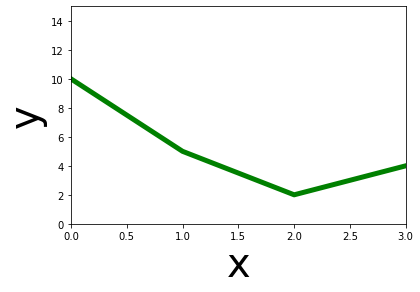

In [22]:
import matplotlib.pyplot as plt
plt.plot([10,5,2,4],color="green",label = 'line 1',linewidth = 5)#设置线条参数
plt.ylabel('y',fontsize = 40)
plt.xlabel('x',fontsize = 40)
plt.axis([0,3,0,15])                           
plt.show()

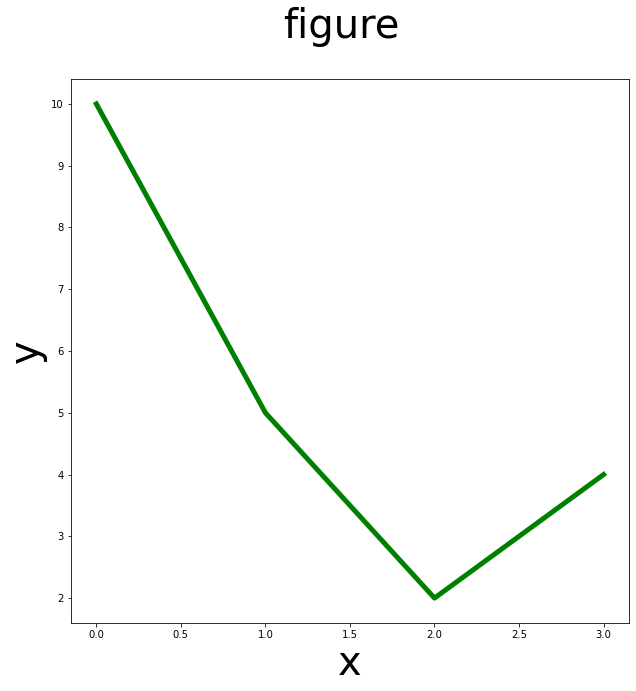

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)                     #添加子图
ax.set_xlabel('x',fontsize=40)                #设置x,y标签
ax.set_ylabel('y',fontsize=40)
fig.suptitle('figure',fontsize=40)            #设置标题
ax.plot([10,5,2,4],color='green',label = 'line 1',linewidth=5)
fig.savefig('figure.png')

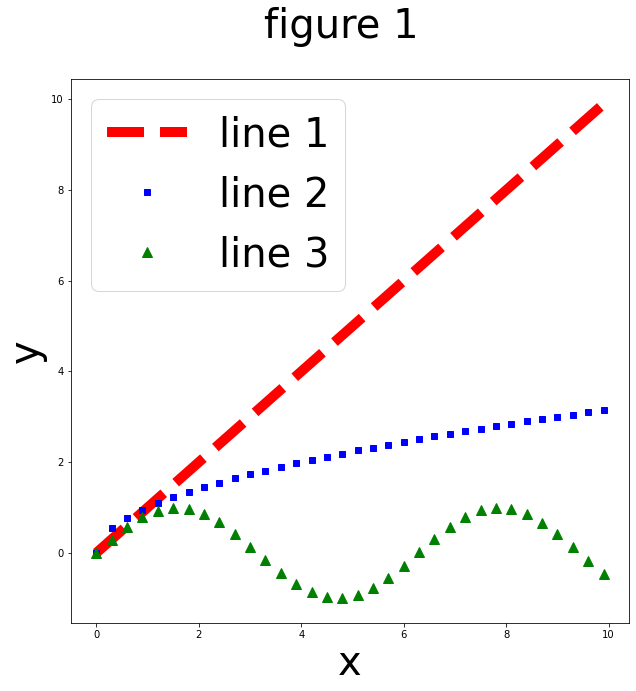

In [24]:
import numpy as np
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)                        #添加子图，只有这一个，所以相当于全图
r = np.arange(0,10.,0.3)                         #生成数组
p1, = ax.plot(r,r,'r--',label = 'line 1',linewidth = 10)#设置线条样式
p2, = ax.plot(r,r**0.5,'bs',label = 'line 2',linewidth = 10)
p3, = ax.plot(r,np.sin(r),'g^',label = 'line 3',markersize = 10)
handles,labels = ax.get_legend_handles_labels()  #返回ax对象中的句柄列表和标签
ax.legend(handles,labels,fontsize = 40)          #设置x，y标签参数
ax.set_xlabel('x',fontsize = 40)
ax.set_ylabel('y',fontsize = 40)
fig.suptitle('figure 1',fontsize = 40)           #设置标题
fig.savefig('./src/figure_multiplelines.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
colors = ['b','c','y','m','r']
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(np.random(10),np.random.random(10),marker = 'x',color = colors[0])
p1=ax.scatter(np.random.random(10),np.random.random(10),marker='x',color=colors[1],s = 50)
p2=ax.scatter(np.random.random(10),np.random.random(10),marker='o',color=colors[2],s = 50)
p3=ax.scatter(np.random.random(10),np.random.random(10),marker='o',color=colors[3],s = 50)
ax.legend((p1,p2,p3),('point 1','point 2','point 3'),fontsize = 20)
ax.set_xlabel('x',fontsize = 40)
ax.set_ylabel('y',fontsize = 40)
fig.savefig('./src/figure_scatterplot.png')